# ML ,DL, BERT, Deepseek Model Performance Comparision for web service categories(50)
# Baseline model target to reach 80% accuracy ,precision,recall,f1-score
# Phase 03 - target to reach 90% accuracy ,precision,recall,f1-score

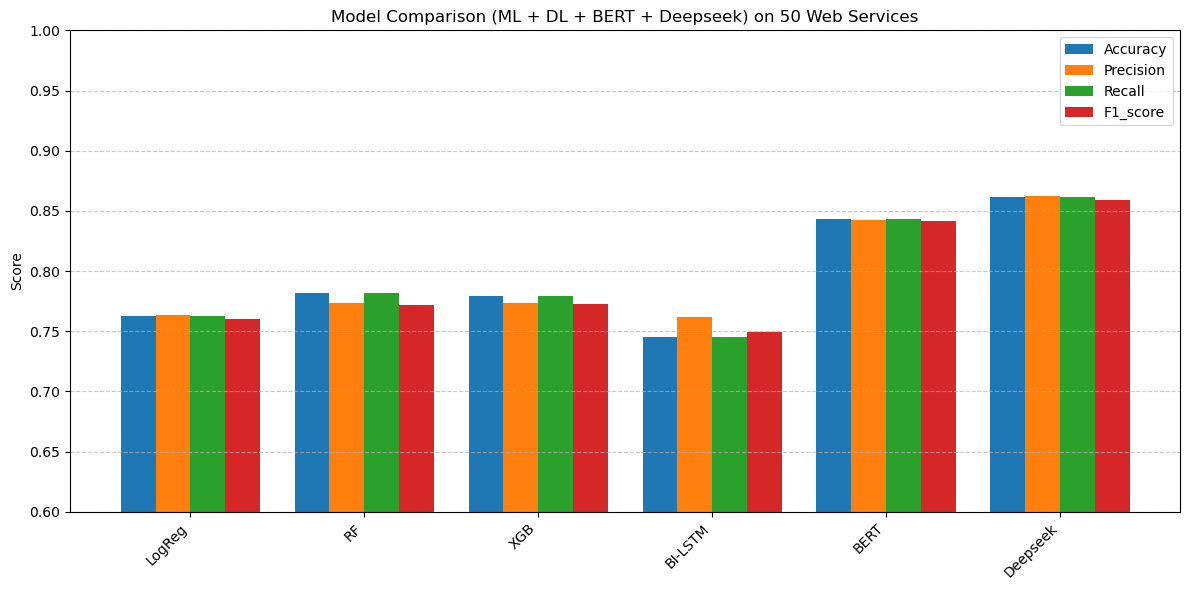

In [21]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load both result files
with open("../../Phase-02/models/results/ml_dl_bert_model_results.pkl", "rb") as f:
    ml_dl_bert_model_results = pickle.load(f)

with open("../../Phase-02/models/results/bert_roberta_results.pkl", "rb") as f:
    bert_results = pickle.load(f)

bert_results[0]['model']="BERT"
with open("results/deepseek_results.pkl", "rb") as f:
    deepseek_results = pickle.load(f)

# Combine results into a single list
combined_results = ml_dl_bert_model_results + bert_results + deepseek_results
# Convert to DataFrame
df = pd.DataFrame(combined_results)
# Plot settings
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
bar_width = 0.2
x = range(len(df))

# Plot each metric group
for i, metric in enumerate(metrics):
    plt.bar([p + bar_width * i for p in x], df[metric], width=bar_width, label=metric.capitalize())

# X-axis labels and aesthetics
plt.xticks([p + bar_width * 1.5 for p in x], df['model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.title('Model Comparison (ML + DL + BERT + Deepseek) on 50 Web Services')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


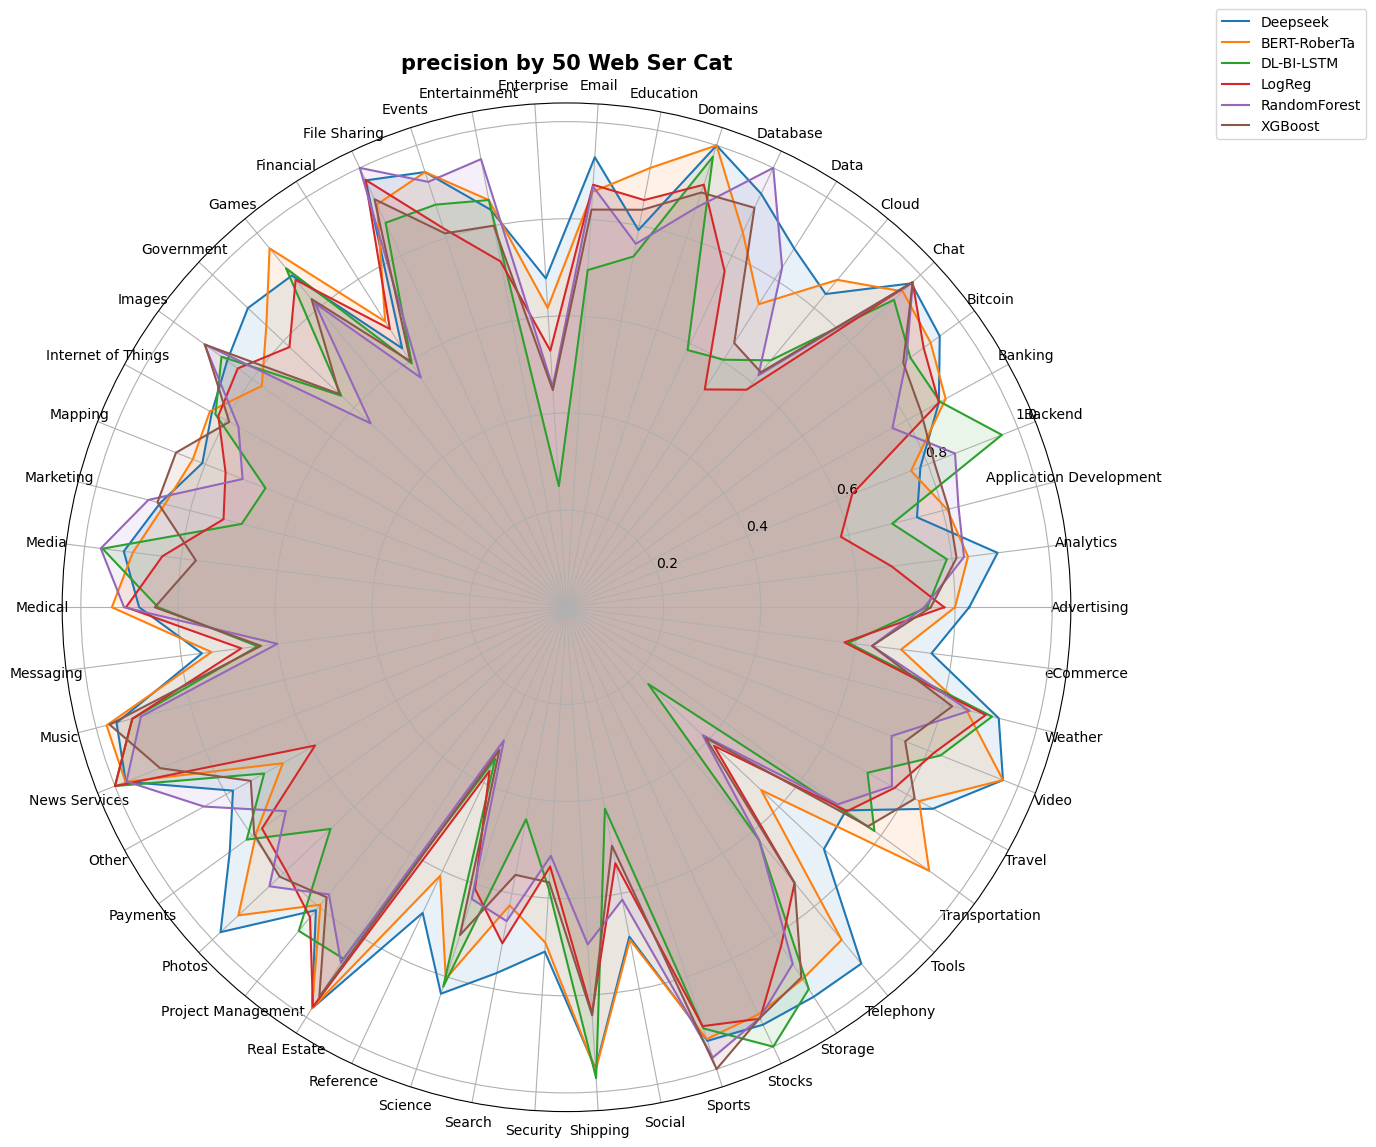

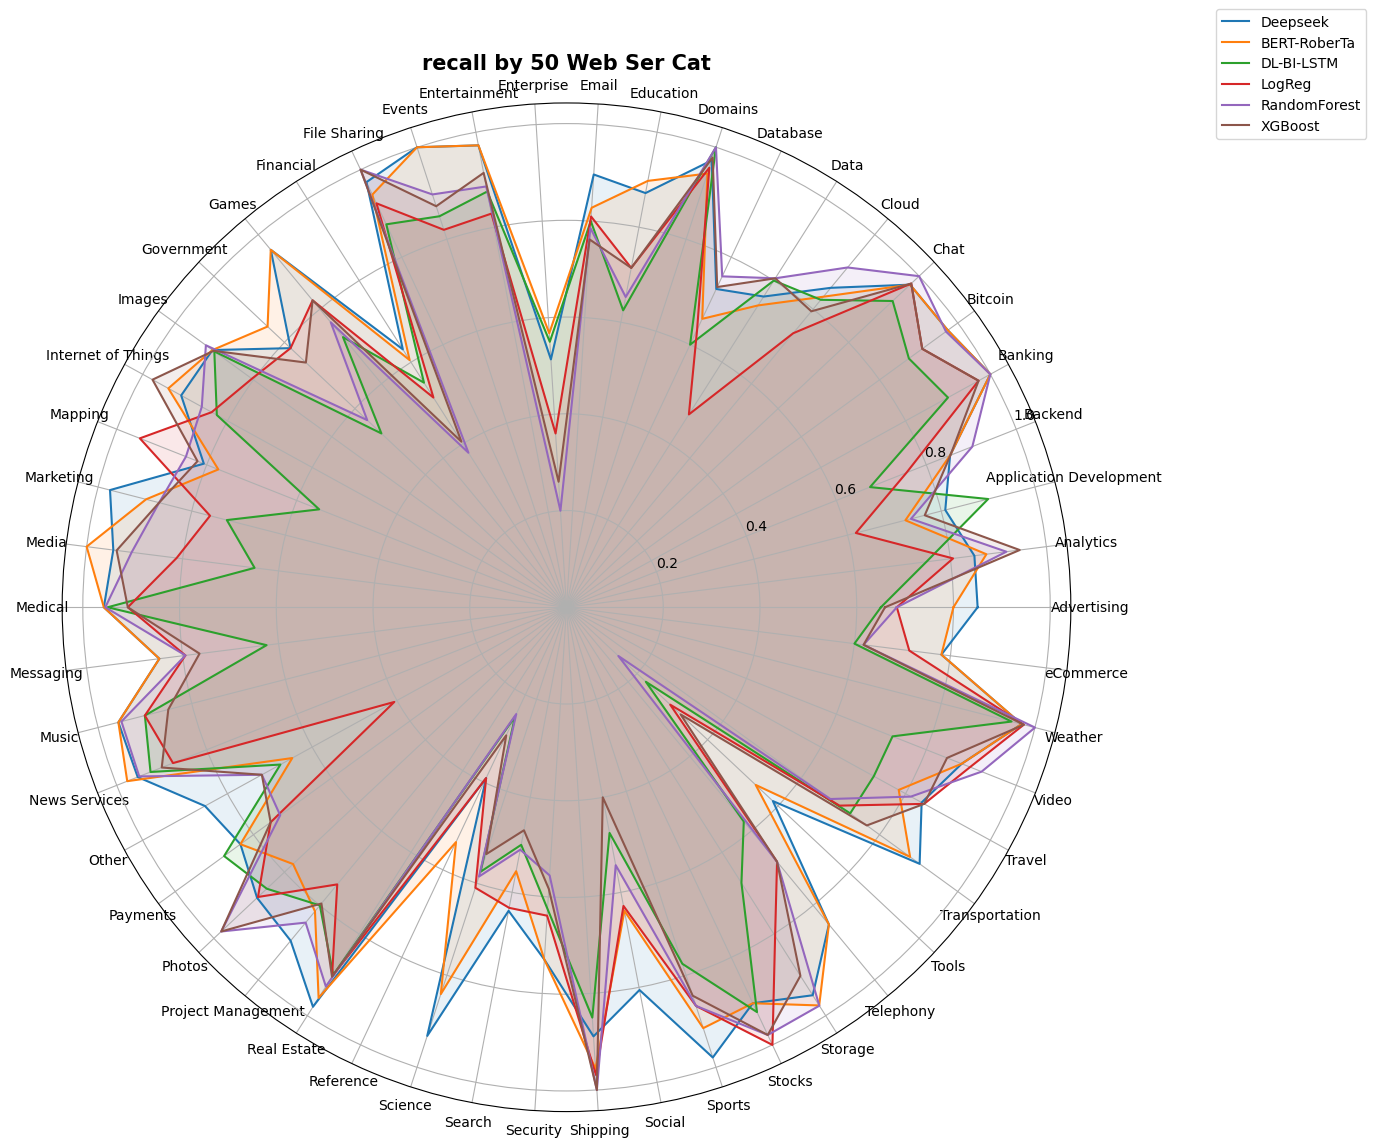

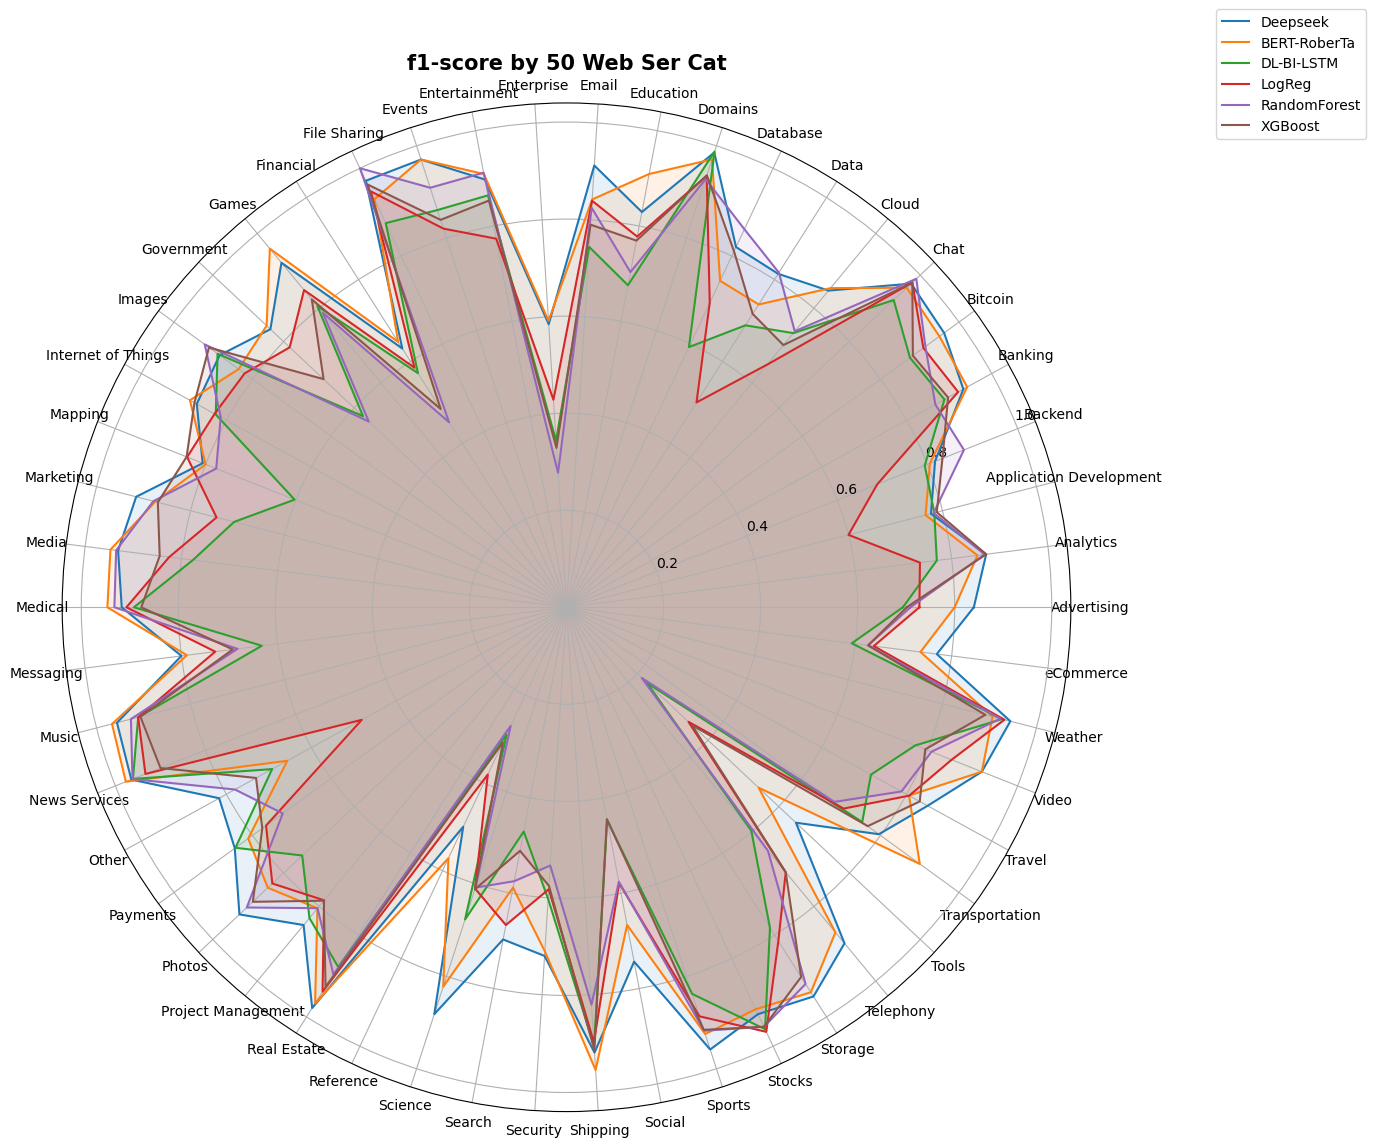

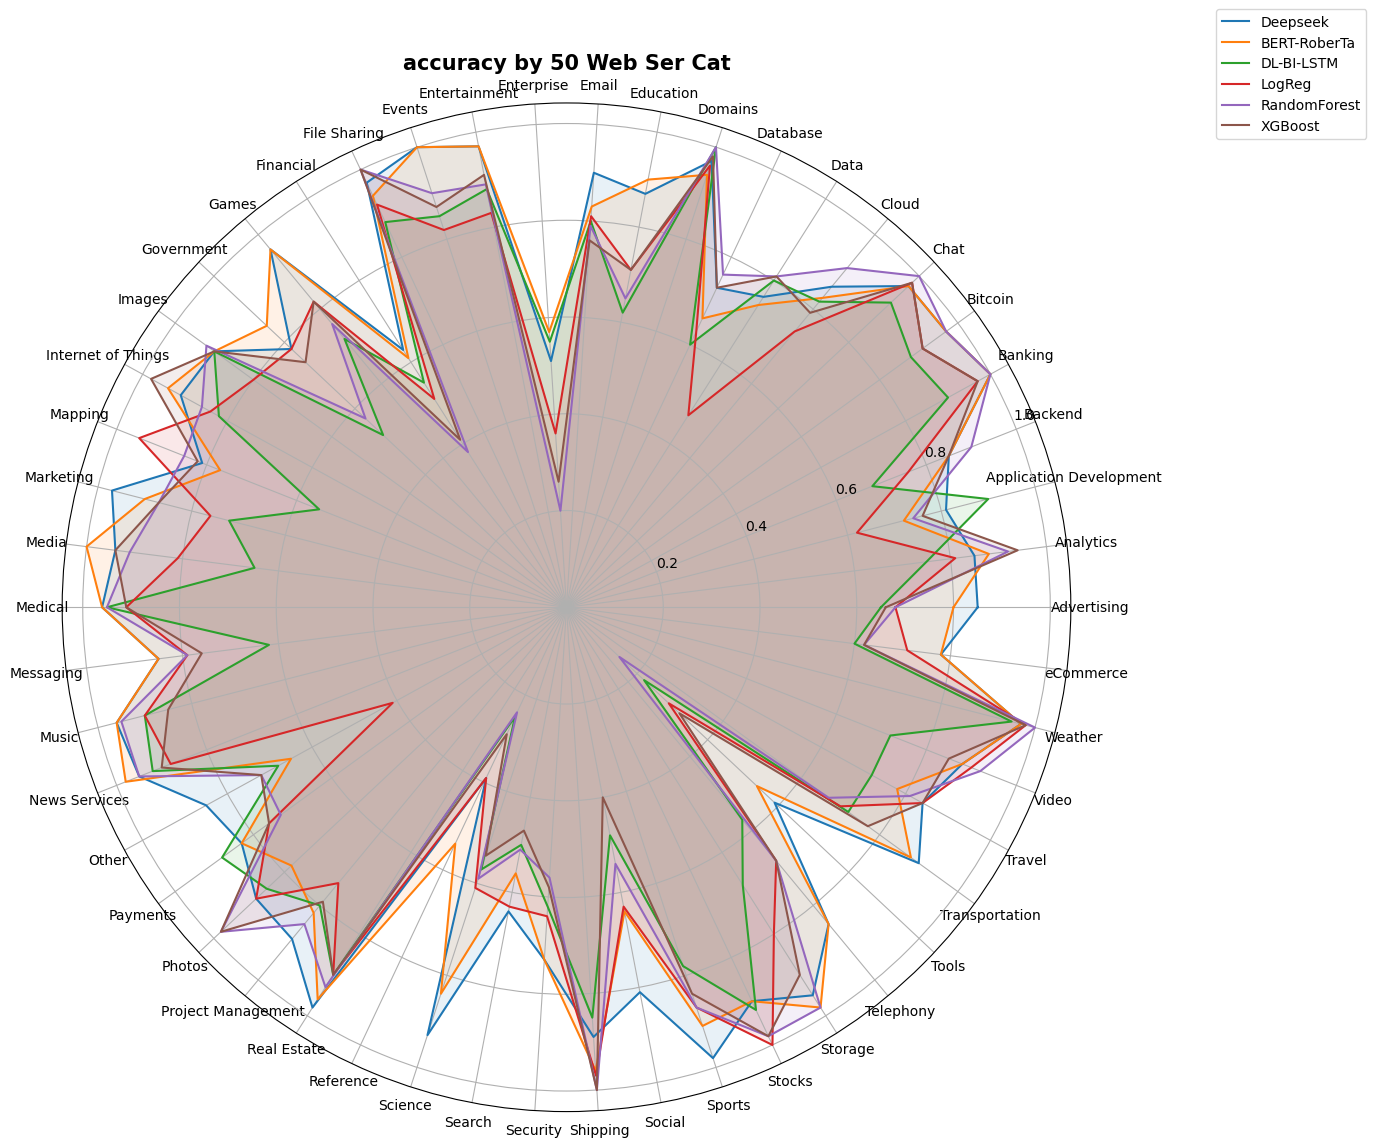

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# List of files with labels
files = {
    "Deepseek":f"results/Deepseek-Report-Top-50.csv",
    "BERT-RoberTa": f"../../Phase-02/models/results/BERT-Report-Top-50.csv",
    "DL-BI-LSTM": f"../../Phase-02/models/results/DL-Report-BI-LSTM Top 50.csv",
    "LogReg": f"../../Phase-02/models/results/ML-Report-LogReg TFIDF + SBERT with 50 Web Services.csv",
    "RandomForest": f"../../Phase-02/models/results/ML-Report-RF TFIDF + SBERT with 50 Web Services.csv",
    "XGBoost": f"../../Phase-02/models/results/ML-Report-XGB TFIDF + SBERT with 50 Web Services.csv"
}

# Load all files
data = {}
for model, file in files.items():
    df = pd.read_csv(file, sep=None, engine="python")
    df.set_index('Category', inplace=True)
    data[model] = df

# Function to plot radar chart for a specific metric
def plot_radar(metric):
    labels = data[list(data.keys())[0]].index.tolist()
    num_labels = len(labels)
    angles = [n / float(num_labels) * 2 * pi for n in range(num_labels)]
    angles += angles[:1]

    plt.figure(figsize=(14, 14))
    ax = plt.subplot(111, polar=True)

    for model_name, df in data.items():
        values = df[metric].tolist()
        values += values[:1]
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'{metric} by 50 Web Ser Cat', size=15, weight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Plot for each metric
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
for m in metrics:
    plot_radar(m)
